In [1]:
# Importing the requried libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
# get file paths in a list
file_paths = [r'E:\GitHub\Singapore_Resale\Data\1.csv',
              r'E:\GitHub\Singapore_Resale\Data\2.csv',
              r'E:\GitHub\Singapore_Resale\Data\3.csv',
              r'E:\GitHub\Singapore_Resale\Data\4.csv',
              r'E:\GitHub\Singapore_Resale\Data\5.csv'
             ]
# declare an empty list
dfs = []
# append each csv to the dfs list
for file_path in file_paths:
    df_sep = pd.read_csv(file_path)
    dfs.append(df_sep)
# combine them using concat
df = pd.concat(dfs, ignore_index=True)

In [3]:
# display the combined dataframe
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


In [4]:
df.shape

(912891, 11)

In [5]:
# Checking datatypes and null/non-null values distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912891 entries, 0 to 912890
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                912891 non-null  object 
 1   town                 912891 non-null  object 
 2   flat_type            912891 non-null  object 
 3   block                912891 non-null  object 
 4   street_name          912891 non-null  object 
 5   storey_range         912891 non-null  object 
 6   floor_area_sqm       912891 non-null  float64
 7   flat_model           912891 non-null  object 
 8   lease_commence_date  912891 non-null  int64  
 9   resale_price         912891 non-null  float64
 10  remaining_lease      203841 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.6+ MB


In [6]:
# Checking the distribution of Numerical values in the dataset
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,912891.000000,912891.000000,9.128910e+05
mean,95.699242,1988.120107,3.165246e+05
std,25.853297,10.501403,1.668116e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.910000e+05
50%,93.000000,1986.000000,2.938889e+05
75%,113.000000,1996.000000,4.110000e+05
max,307.000000,2022.000000,1.500000e+06


In [7]:
# Unique values in each column
for col in df.columns[0:]:
    print(col,':', (df[col].nunique()),'lables')

month : 407 lables
town : 27 lables
flat_type : 8 lables
block : 2694 lables
street_name : 583 lables
storey_range : 25 lables
floor_area_sqm : 210 lables
flat_model : 34 lables
lease_commence_date : 56 lables
resale_price : 9324 lables
remaining_lease : 718 lables


In [8]:
# Null Values
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [9]:
# Dropping the majority null value columns
# (i.e) remaining_lease = 709050
df = df.drop(columns ='remaining_lease')
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...
912886,2023-05,YISHUN,EXECUTIVE,827,YISHUN ST 81,01 TO 03,154.0,Maisonette,1987,829000.0
912887,2023-05,YISHUN,EXECUTIVE,824,YISHUN ST 81,07 TO 09,146.0,Maisonette,1987,855000.0
912888,2023-07,YISHUN,EXECUTIVE,837,YISHUN ST 81,01 TO 03,146.0,Maisonette,1988,860000.0
912889,2023-01,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,07 TO 09,179.0,Multi Generation,1987,1080000.0


In [10]:
# After droping the column
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

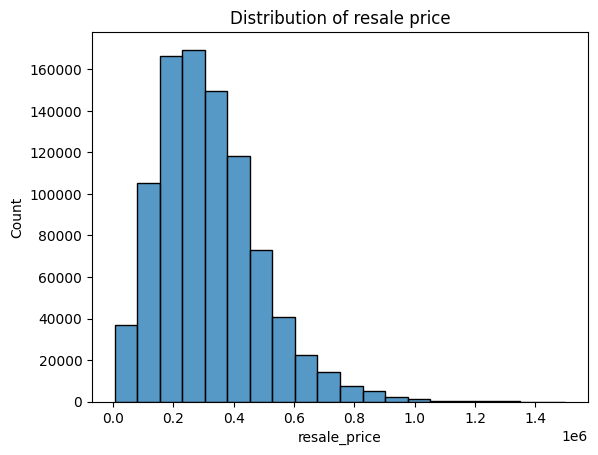

In [11]:
# Visualize the distribution of the resale price column
sns.histplot(df['resale_price'], bins = 20)
plt.title('Distribution of resale price')

plt.show()

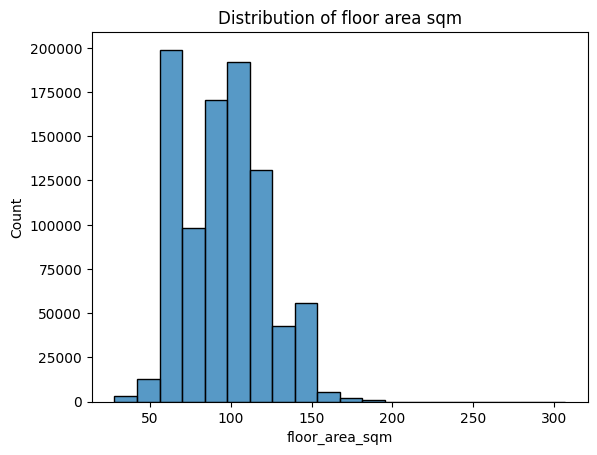

In [12]:
# Visualize the distribution of the floor area sqm column
sns.histplot(df['floor_area_sqm'], bins = 20)
plt.title('Distribution of floor area sqm')
# plt.grid()
plt.show()

In [13]:
df['flat_type'].value_counts()

4 ROOM              346221
3 ROOM              292472
5 ROOM              192176
EXECUTIVE            68777
2 ROOM               11408
1 ROOM                1299
MULTI GENERATION       279
MULTI-GENERATION       259
Name: flat_type, dtype: int64

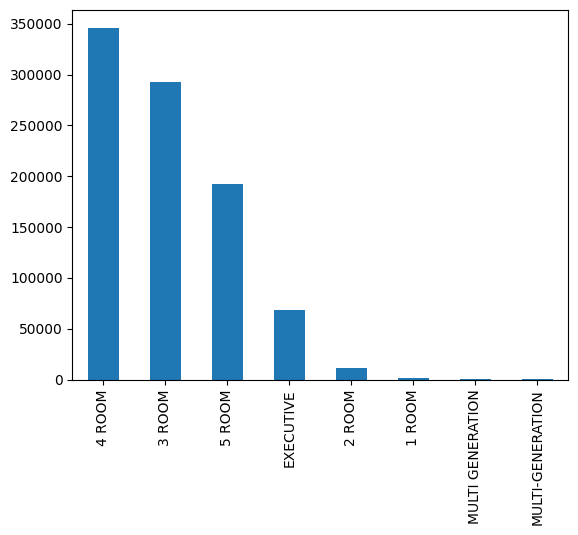

In [14]:
df['flat_type'].value_counts().plot(kind = 'bar')
plt.show()

In [15]:
# Unique lables in flat_type column
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [16]:
# Collapsing the flat_type categories
mapping={'MULTI-GENERATION':'MULTI GENERATION'}

df['flat_type'] = df['flat_type'].replace(mapping)
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

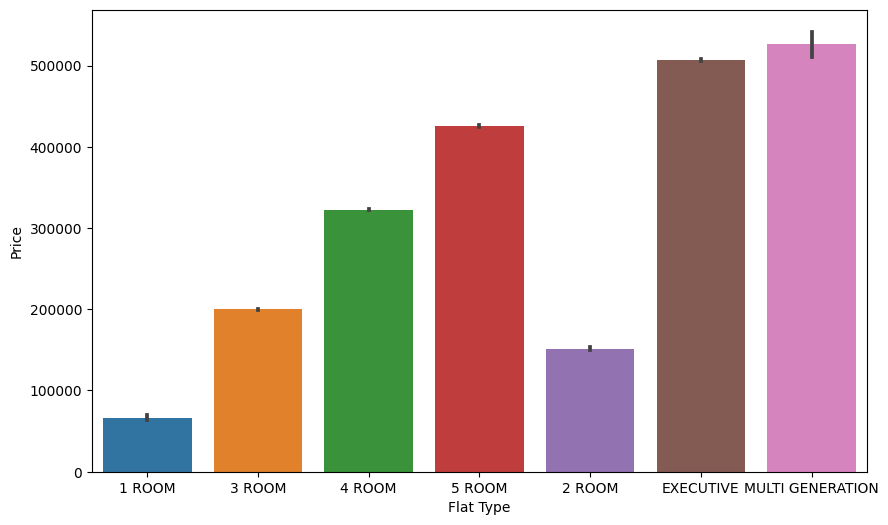

In [17]:
# Visualize the distribution of the flat_type column
plt.figure(figsize=(10, 6))
sns.barplot(x = df['flat_type'], y = df['resale_price'])
plt.xlabel('Flat Type')
plt.ylabel('Price')
plt.show()

In [18]:
# flat_type value pair replacing
value_re = {'1 ROOM': 1,
            '2 ROOM': 2,
            '3 ROOM': 3,
            '4 ROOM': 4,
            '5 ROOM': 5,
            'EXECUTIVE': 6,
            'MULTI GENERATION': 7}
df["flat_type"] = df["flat_type"].replace(value_re)
df['flat_type']

0         1
1         1
2         1
3         1
4         3
         ..
912886    6
912887    6
912888    6
912889    7
912890    7
Name: flat_type, Length: 912891, dtype: int64

In [19]:
df["flat_type"].value_counts()

4    346221
3    292472
5    192176
6     68777
2     11408
1      1299
7       538
Name: flat_type, dtype: int64

In [20]:
# Visualize the distribution of the flat_model column
print(df['flat_model'].nunique())
df['flat_model'].unique()

34


array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [21]:
# Converting the flat_model column to lowercase
df['flat_model'] = df['flat_model'].str.lower()

In [22]:
# Unique lables in flat_model column
df['flat_model'].nunique()

21

In [23]:
# Visualizing the distribution of the flat_model column
df['flat_model'].value_counts()

model a                   259416
improved                  238468
new generation            187293
simplified                 57057
premium apartment          45370
standard                   42219
apartment                  35042
maisonette                 29304
model a2                    9981
dbss                        3158
model a-maisonette          2053
adjoined flat               1231
terrace                      688
multi generation             538
type s1                      427
type s2                      210
improved-maisonette          125
premium apartment loft       103
2-room                       101
premium maisonette            86
3gen                          21
Name: flat_model, dtype: int64

In [24]:
# Encoding flat_model column
le = preprocessing.LabelEncoder()
flat_modelcode = le.fit_transform(df['flat_model'])
df.insert(loc = 8,
          column = 'flat_modelcode',
          value = flat_modelcode)

In [25]:
df['flat_modelcode'].value_counts().sort_index()

0        101
1         21
2       1231
3      35042
4       3158
5     238468
6        125
7      29304
8     259416
9       2053
10      9981
11       538
12    187293
13     45370
14       103
15        86
16     57057
17     42219
18       688
19       427
20       210
Name: flat_modelcode, dtype: int64

In [26]:
# town column
df['town'].nunique()

27

In [27]:
# Visualize the distribution of the town column
df['town'].value_counts()

TAMPINES           78984
YISHUN             69088
BEDOK              65947
JURONG WEST        65653
WOODLANDS          64489
ANG MO KIO         51539
HOUGANG            49891
BUKIT BATOK        43540
CHOA CHU KANG      37674
BUKIT MERAH        33823
PASIR RIS          32874
SENGKANG           31451
TOA PAYOH          31151
QUEENSTOWN         28427
GEYLANG            27882
CLEMENTI           27757
BUKIT PANJANG      27267
KALLANG/WHAMPOA    26761
JURONG EAST        24476
SERANGOON          22591
BISHAN             21082
PUNGGOL            19636
SEMBAWANG          13331
MARINE PARADE       7971
CENTRAL AREA        7056
BUKIT TIMAH         2486
LIM CHU KANG          64
Name: town, dtype: int64

In [28]:
# Creating a column with encoded value
town_code = le.fit_transform(df['town'])
df.insert(loc = 2,
          column = 'town_code',
          value = town_code)

In [29]:
# Encoded value coun
df['town_code'].value_counts().sort_index()

0     51539
1     65947
2     21082
3     43540
4     33823
5     27267
6      2486
7      7056
8     37674
9     27757
10    27882
11    49891
12    24476
13    65653
14    26761
15       64
16     7971
17    32874
18    19636
19    28427
20    13331
21    31451
22    22591
23    78984
24    31151
25    64489
26    69088
Name: town_code, dtype: int64

In [3]:
# Print header of storey_range
df['storey_range'].head()

NameError: name 'df' is not defined

In [31]:
# Splitting storey range column
storey=df['storey_range'].str.split(' TO ',expand = True)
storey.head()

,0,1
0,10,12
1,04,06
2,10,12
3,07,09
4,04,06


In [32]:
# Creating the storey minimum values as column
df.insert(loc = 6,
          column = 'storey_min',
          value = storey[0])

In [33]:
# Creating the storey maximum values as column
df.insert(loc = 7,
          column = 'storey_max',
          value = storey[1])

In [34]:
# Splitting month column
month=df['month'].str.split('-',expand = True)
month.head()

,0,1
0,1990,01
1,1990,01
2,1990,01
3,1990,01
4,1990,01


In [35]:
# Creating the year values as column
df.insert(loc = 1,
          column = 'selling_year',
          value = month[0])

In [36]:
# Creating the month values as column
df.insert(loc = 2,
          column = 'selling_month',
          value = month[1])

In [37]:
df

,month,selling_year,selling_month,town,town_code,flat_type,block,street_name,storey_min,storey_max,storey_range,floor_area_sqm,flat_model,flat_modelcode,lease_commence_date,resale_price
0,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,9000.0
1,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,04,06,04 TO 06,31.0,improved,5,1977,6000.0
2,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,10,12,10 TO 12,31.0,improved,5,1977,8000.0
3,1990-01,1990,01,ANG MO KIO,0,1,309,ANG MO KIO AVE 1,07,09,07 TO 09,31.0,improved,5,1977,6000.0
4,1990-01,1990,01,ANG MO KIO,0,3,216,ANG MO KIO AVE 1,04,06,04 TO 06,73.0,new generation,12,1976,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912886,2023-05,2023,05,YISHUN,26,6,827,YISHUN ST 81,01,03,01 TO 03,154.0,maisonette,7,1987,829000.0
912887,2023-05,2023,05,YISHUN,26,6,824,YISHUN ST 81,07,09,07 TO 09,146.0,maisonette,7,1987,855000.0
912888,2023-07,2023,07,YISHUN,26,6,837,YISHUN ST 81,01,03,01 TO 03,146.0,maisonette,7,1988,860000.0
912889,2023-01,2023,01,YISHUN,26,7,666,YISHUN AVE 4,07,09,07 TO 09,179.0,multi generation,11,1987,1080000.0


In [38]:
df.to_csv(r'E:\GitHub\Singapore_Resale\Data\Singapore_Resale_Flat_Prices_Predicting.csv')

In [39]:
df.shape

(912891, 16)

In [40]:
# Dealing with datatypes
# Datatyppe of the columns
df.dtypes

month                   object
selling_year            object
selling_month           object
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min              object
storey_max              object
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

In [41]:
# Changing the datatype of numeric columns
df[['selling_year', 'selling_month', 'storey_min', 'storey_max']] = df[['selling_year', 'selling_month', 'storey_min', 'storey_max']].apply(pd.to_numeric, errors='coerce')
df.dtypes

month                   object
selling_year             int64
selling_month            int64
town                    object
town_code                int32
flat_type                int64
block                   object
street_name             object
storey_min               int64
storey_max               int64
storey_range            object
floor_area_sqm         float64
flat_model              object
flat_modelcode           int32
lease_commence_date      int64
resale_price           float64
dtype: object

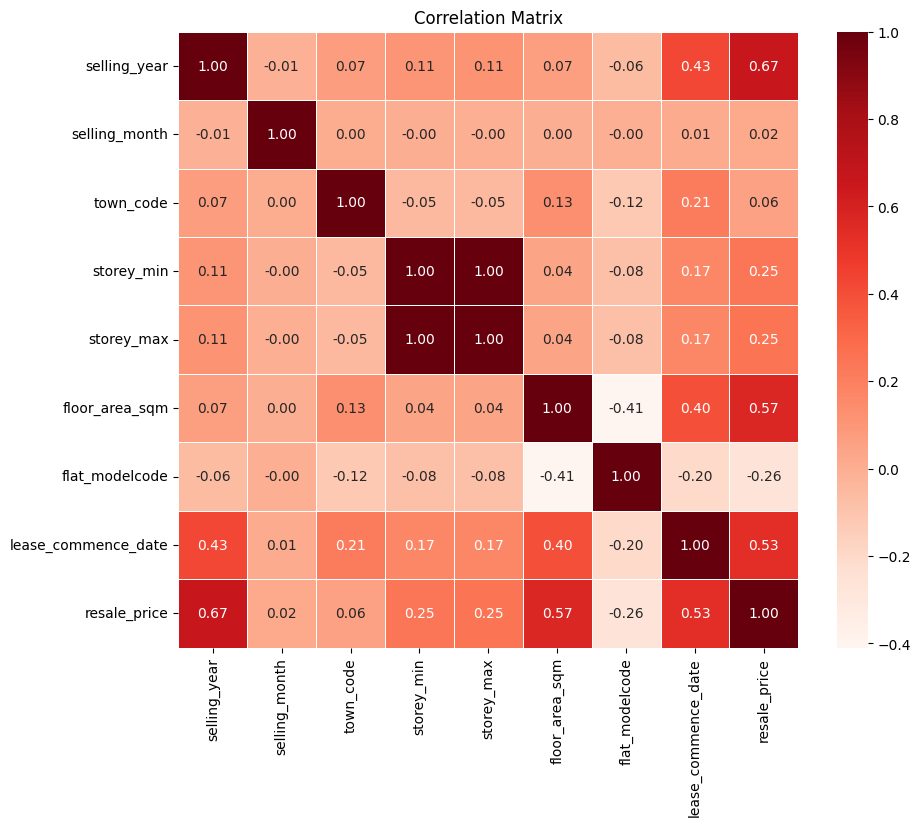

In [42]:
# Correlation matrix
corr_df = df[['selling_year', 'selling_month', 'town_code', 'storey_min', 'storey_max', 'floor_area_sqm', 'flat_modelcode', 'lease_commence_date', 'resale_price']].dropna().corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, cmap="Reds", annot=True, fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()


## **Model Building**

In [43]:
# create x and y variables
X = df[['selling_year','selling_month','town_code','storey_min','storey_max','floor_area_sqm','flat_modelcode','lease_commence_date']]
y = df['resale_price']

In [44]:
# Splitting the data

from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size= 0.8, random_state= 1)

### **According to the results from PyCaret, it is indicated that the "Linear Regression model" performs well.**
PyCaret result = https://colab.research.google.com/drive/1-QkPHQrAdlmjCrk5P-WaY4X0iQDa6PJh?usp=sharing

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
lr = LinearRegression()
kf = KFold(n_splits=10, shuffle=True, random_state=1)
k_fold_scores = cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')

lr.fit(X_train,y_train)

LinearRegression()

In [56]:
coefficients = lr.coef_
coefficients


array([ 10776.14629744,   1225.35145068,  -1155.38436398, -32529.62759388,
        37620.17300407,   3278.28840774,     87.27549405,   1110.39079773])

In [57]:
intercept = lr.intercept_
intercept

-23923425.287639312

In [58]:
y_pred = lr.predict(X_test)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error, explained_variance_score
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

# Display results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Explained Variance Score:", explained_var)



Mean Absolute Error (MAE): 60965.62491431446
Mean Squared Error (MSE): 6745475790.498295
Root Mean Squared Error (RMSE): 82130.84554841922
R-squared (R2): 0.7559519263366015
Mean Absolute Percentage Error (MAPE): 0.23315595160776573
Explained Variance Score: 0.7559519805944237


**Pickling the knowledge of the trained RandomForest Regression model to develop a Streamlit web page for machine learning model presentation.**

In [51]:
# Importing the pickle package
import pickle

# Save the Linear Regression model to a file
with open('linear_regression_model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

In [60]:
# Accuracy score of the model
score = lr.score(X_test,y_test)
print(score * 100,"%")

75.59519263366015 %
